# Pooled OLS

En esta notebook, hacemos ols haciendo un único grupo (de aquí "pooled") de todas las observaciones que tengamos sobre los sujetos.

Primero, carguemos la notebook donde defino las variables a/p, y demás cosas

In [1]:
source("src/notebook_base.R")

Loading required package: plm
Loading required package: Formula
Loading required package: lmtest
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich
Loading required package: sqldf
Loading required package: gsubfn
Loading required package: proto
Loading required package: RSQLite
Loading required package: DBI


Hagamos un plot, para cada variable a/p, de las distinas variables sociales en función del entrainment; es decir, siendo $X=entrainment$ y $Y=engaged\_in\_game$. Agreguemos a ésto la regresión lineal obtenida de estos datos.

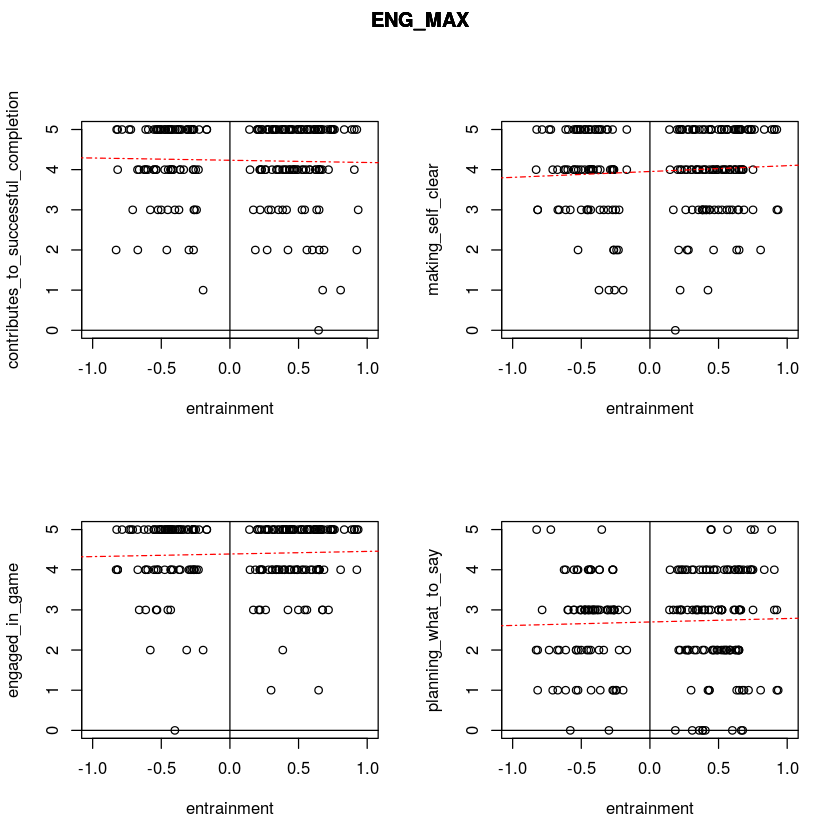

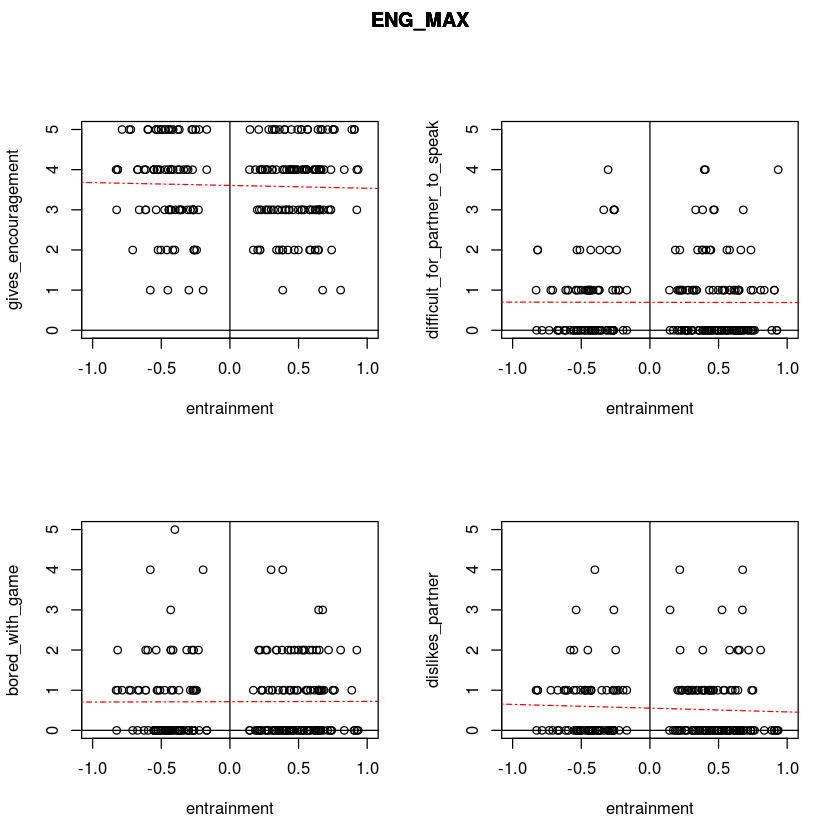

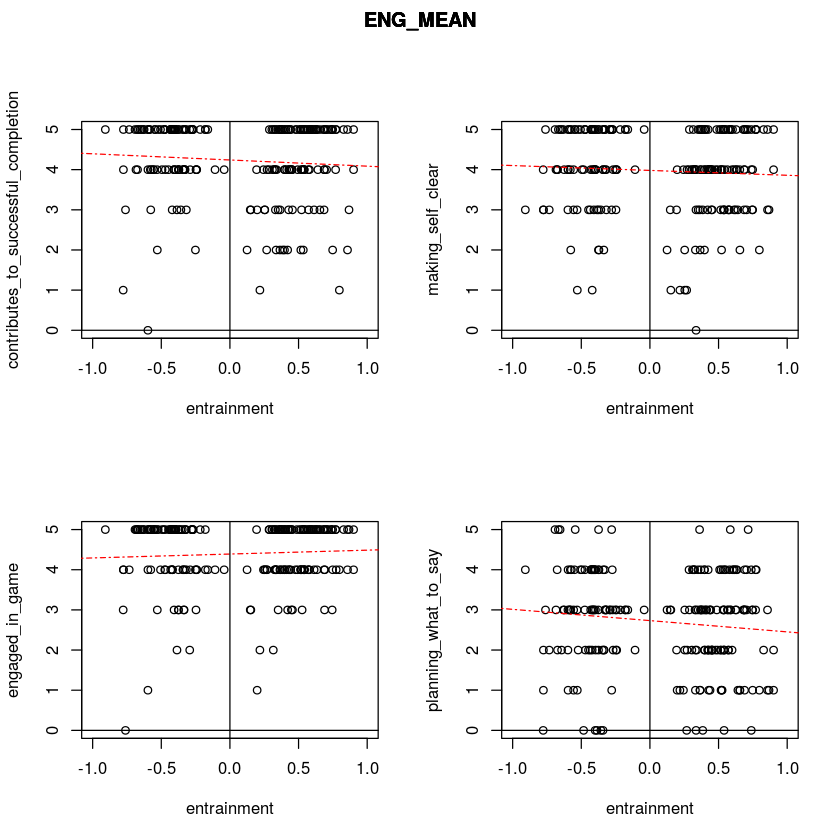

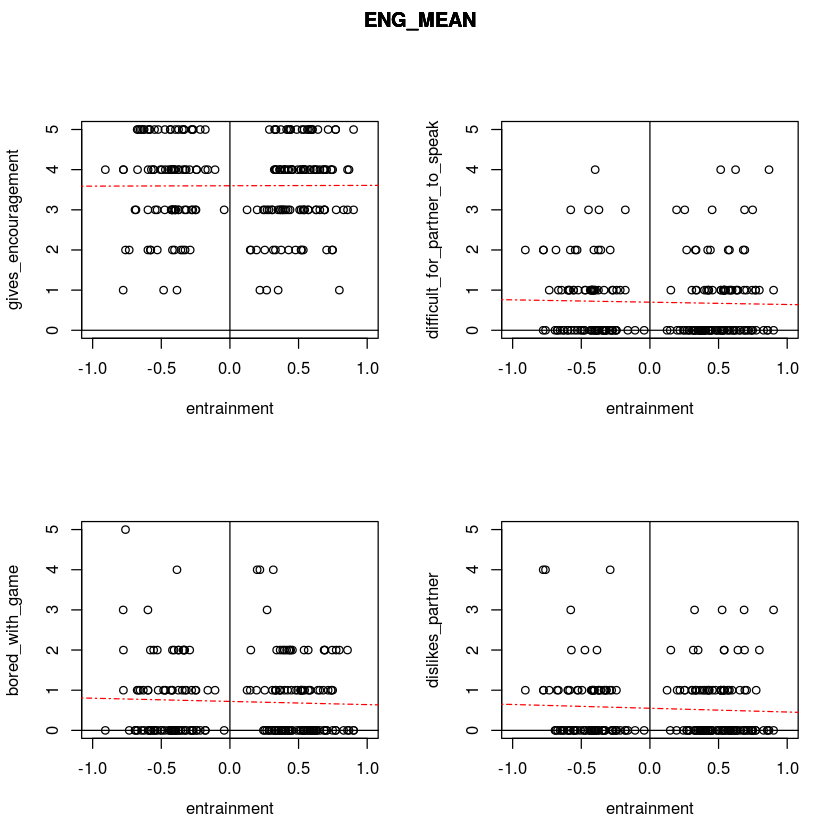

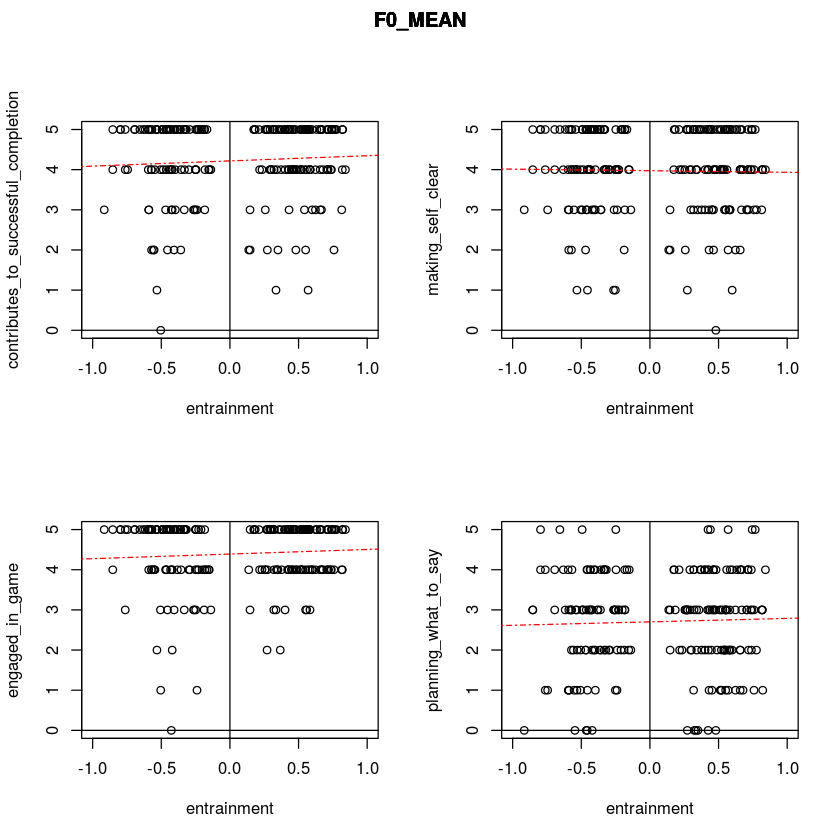

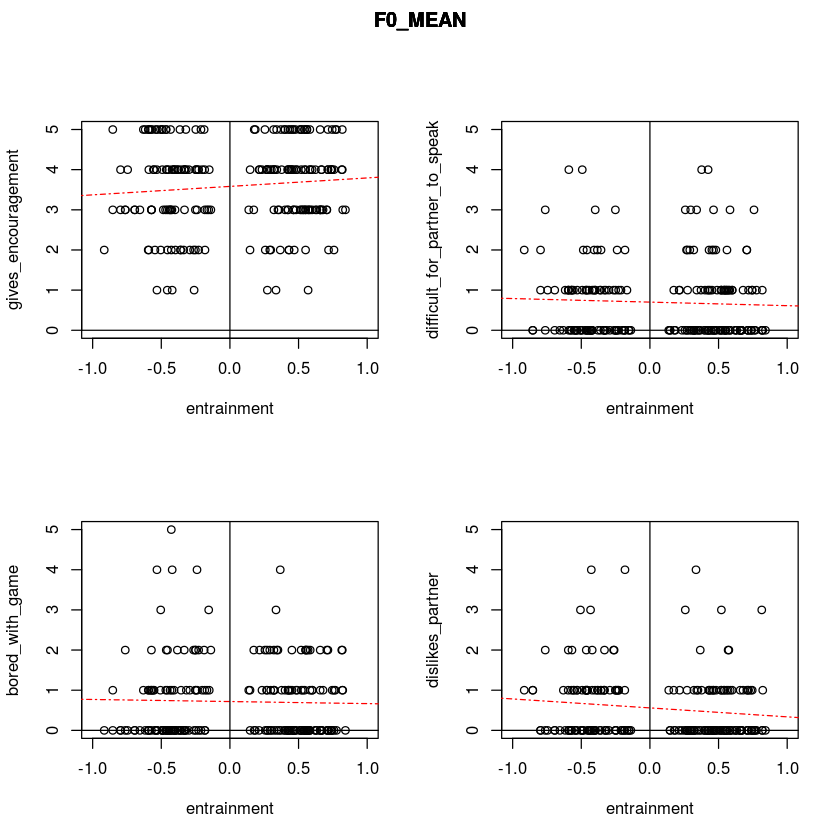

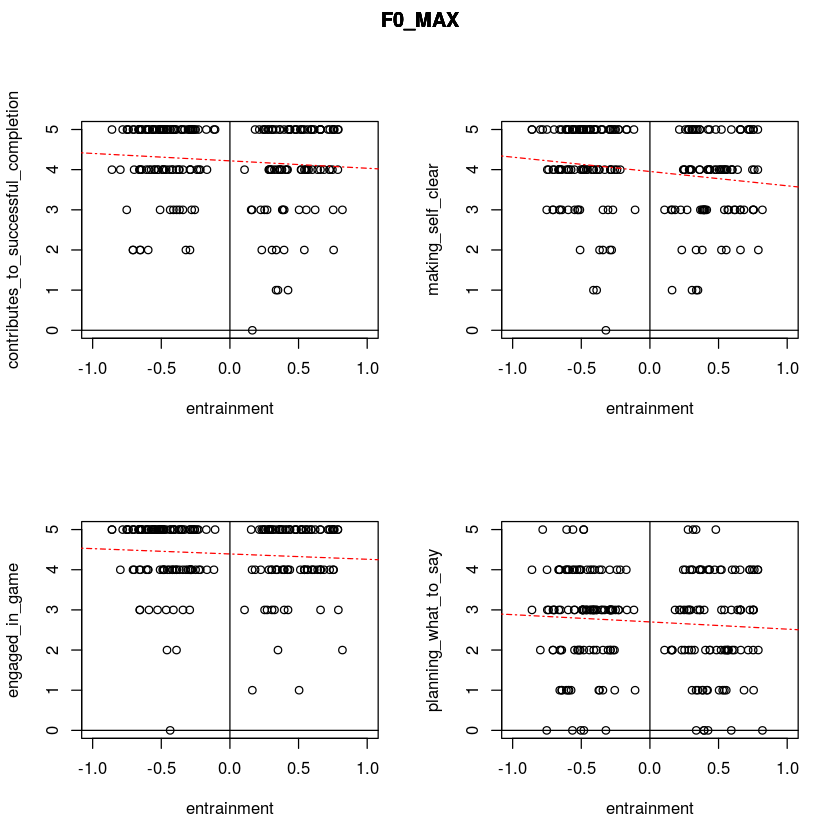

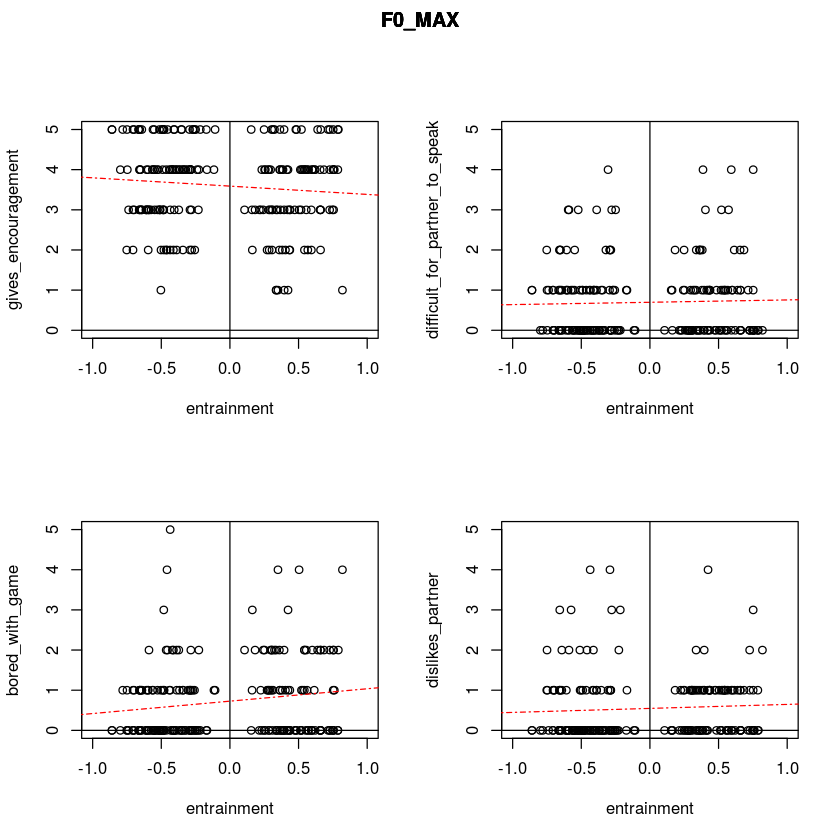

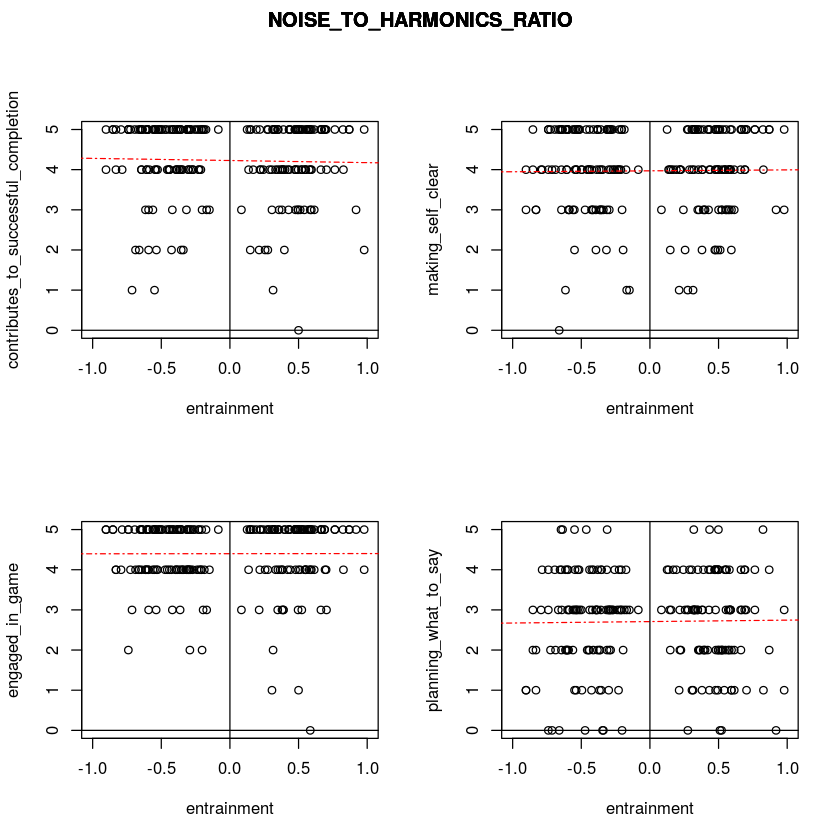

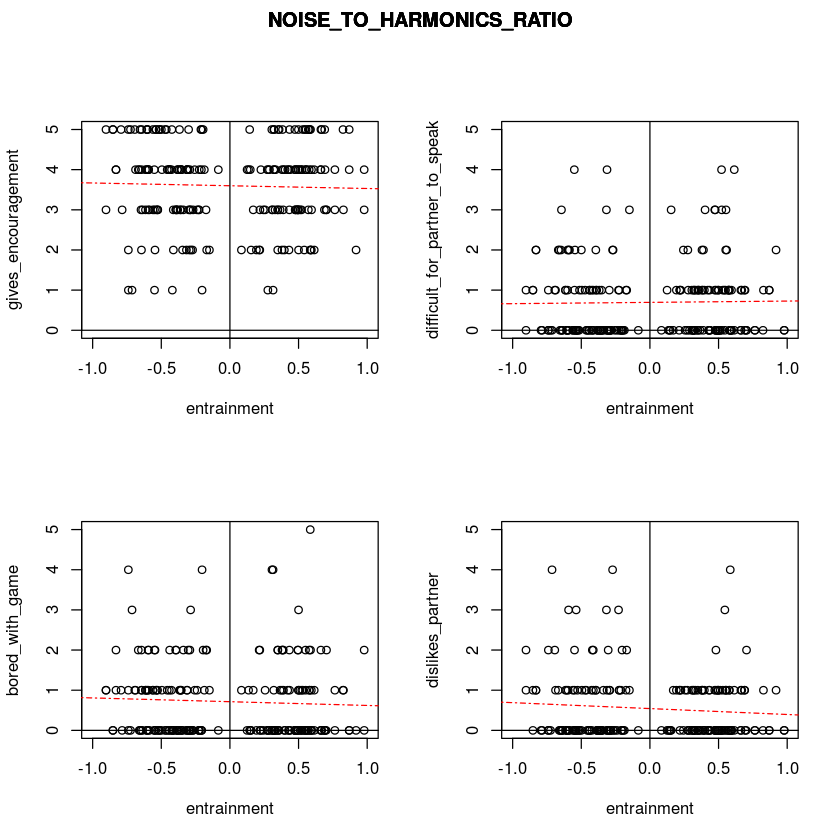

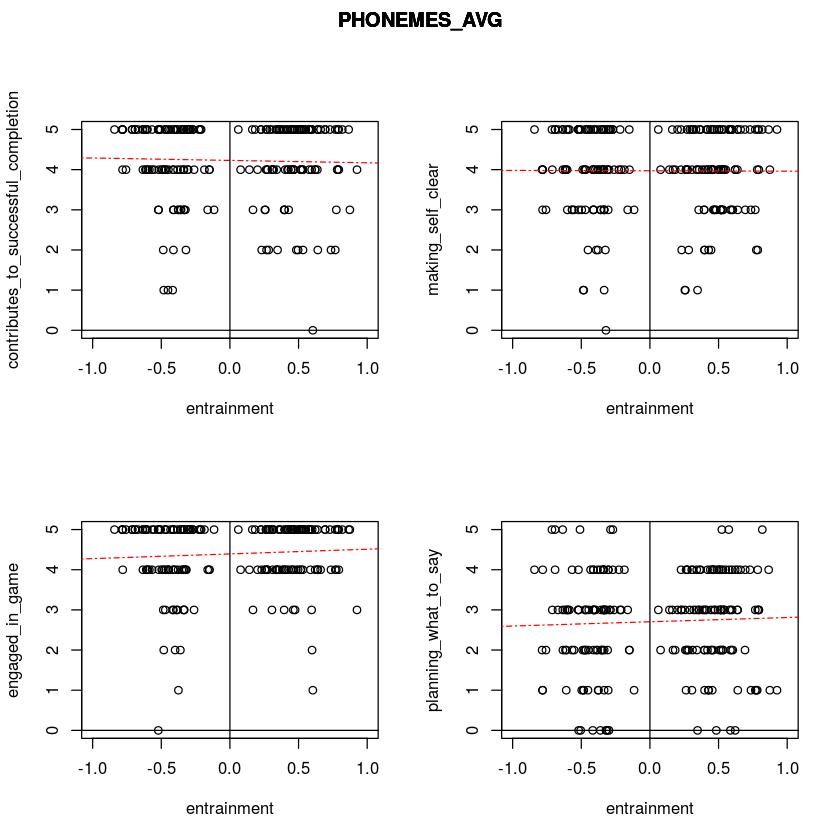

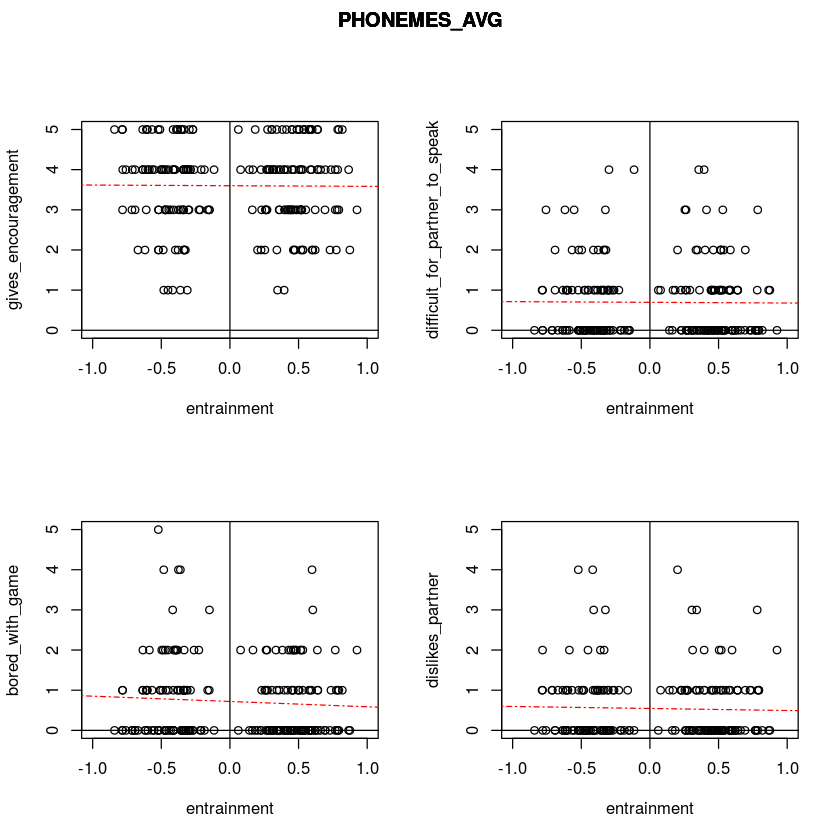

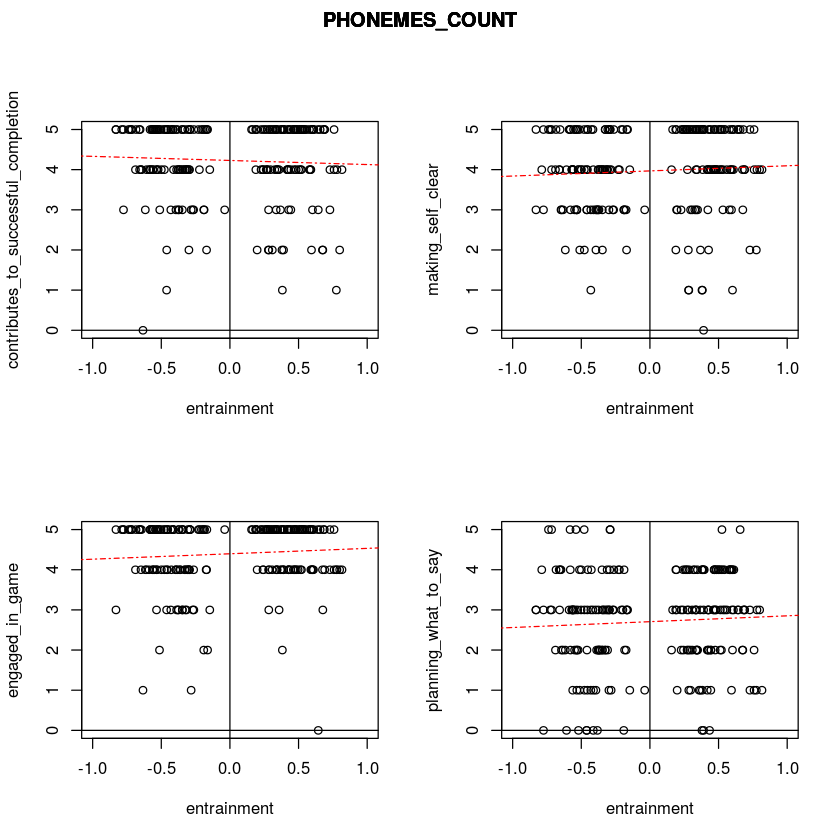

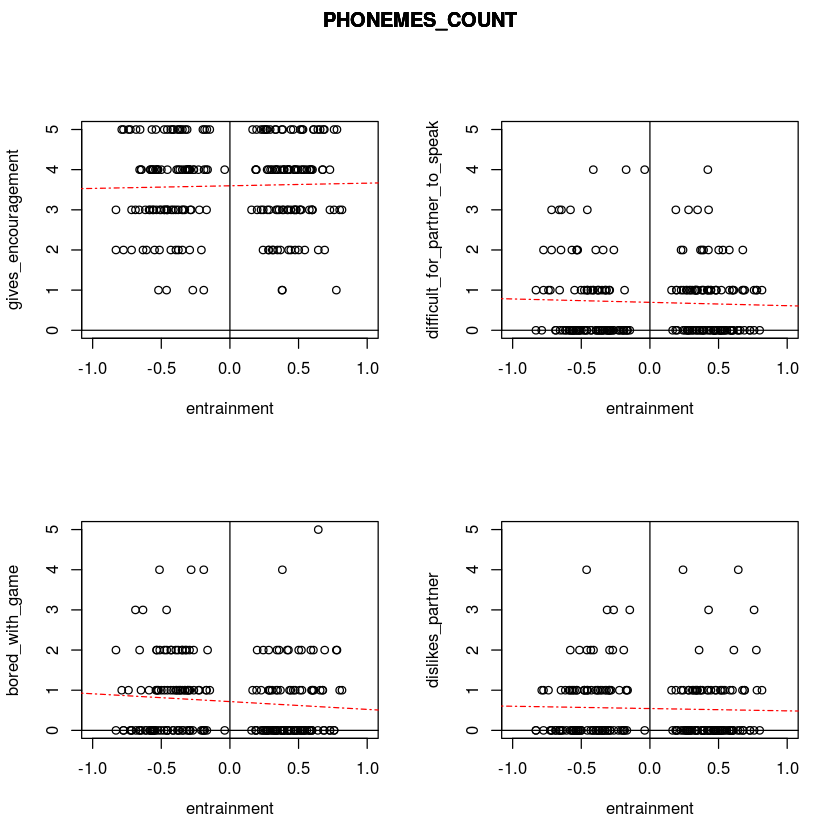

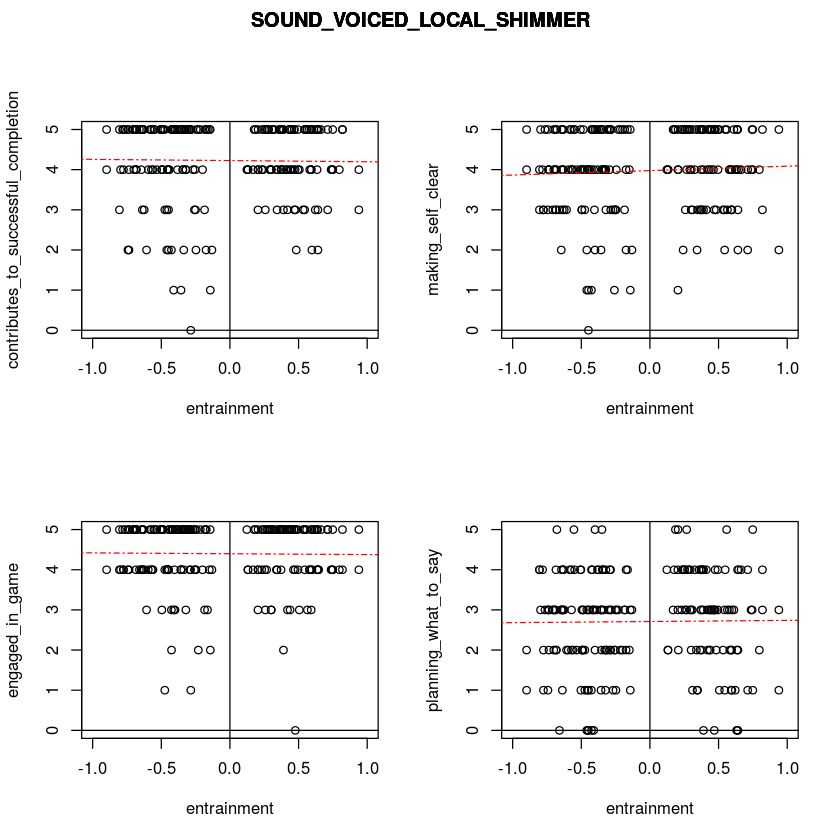

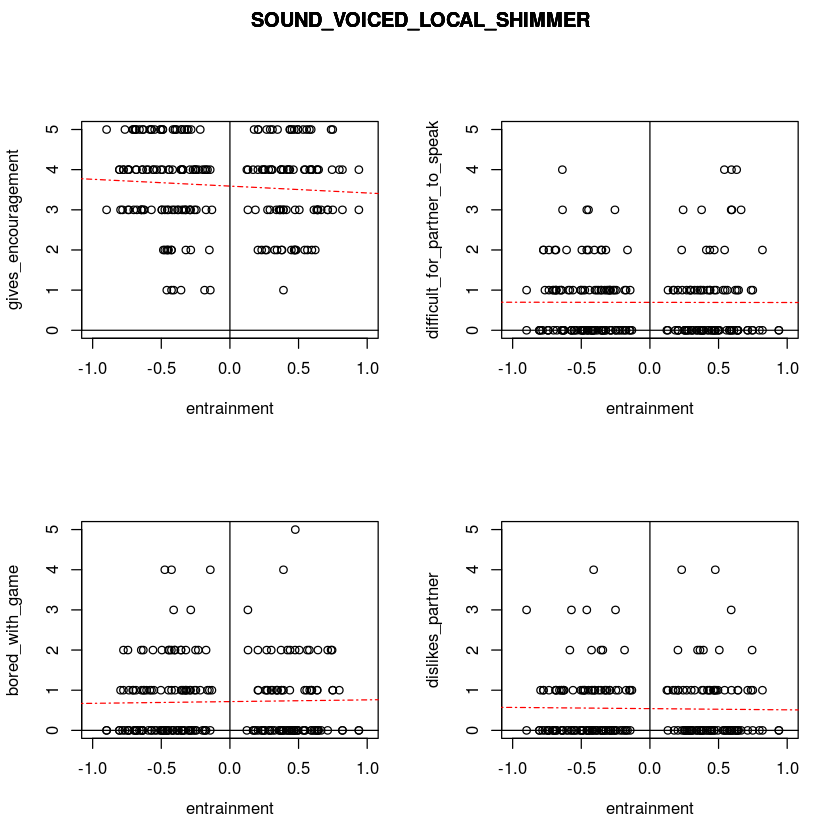

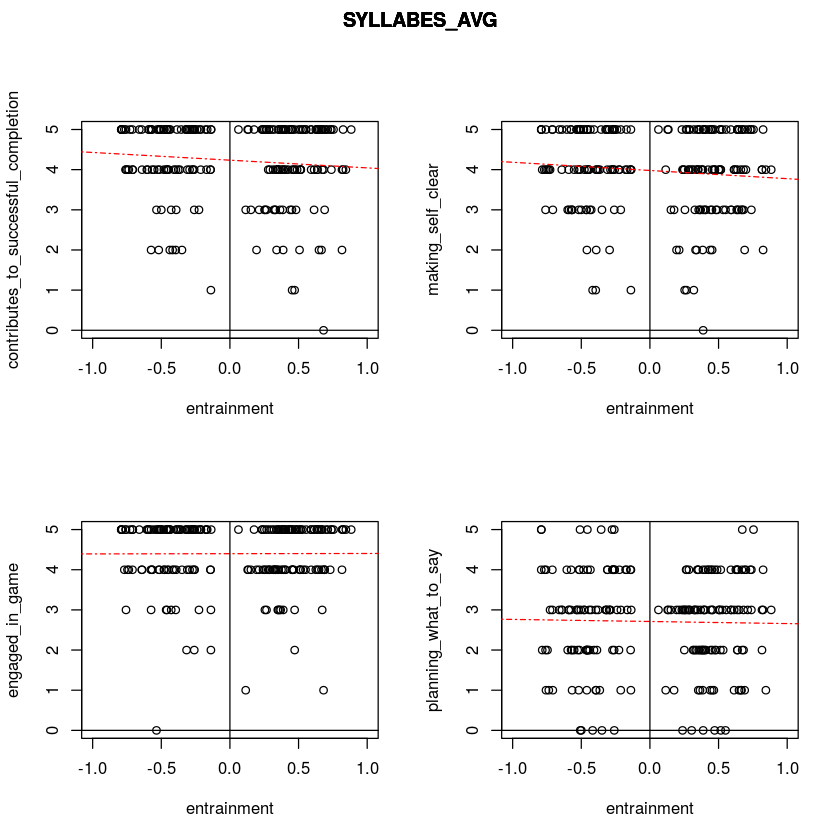

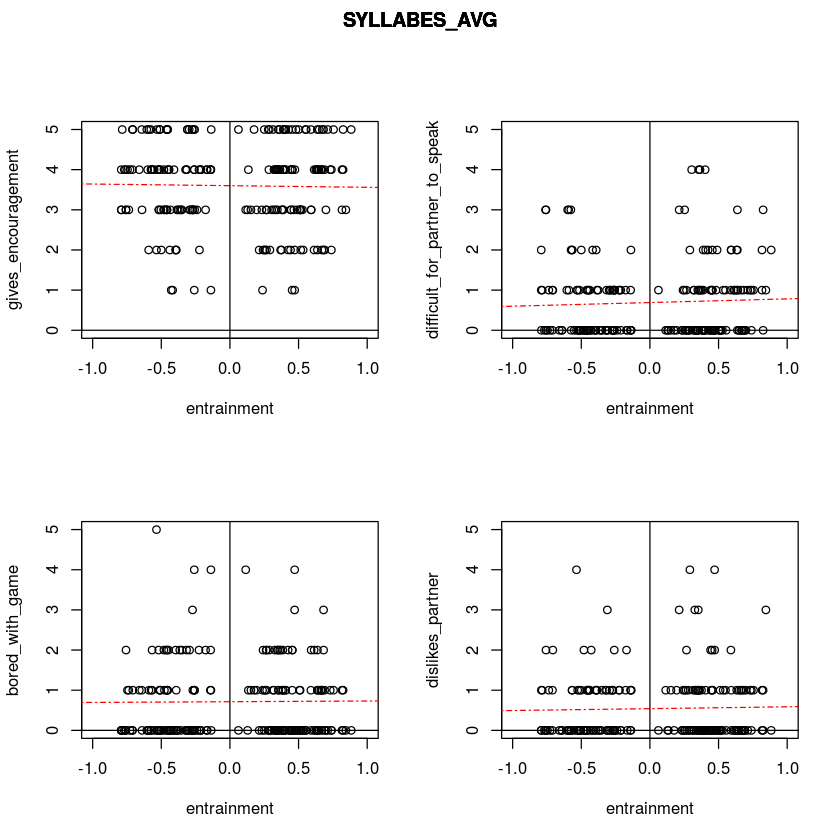

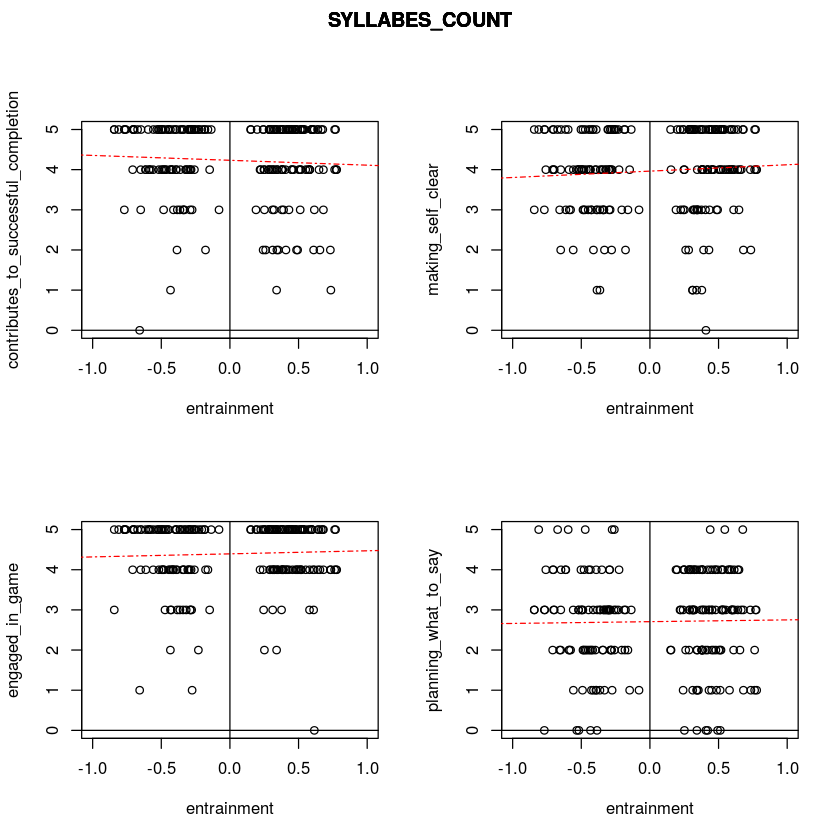

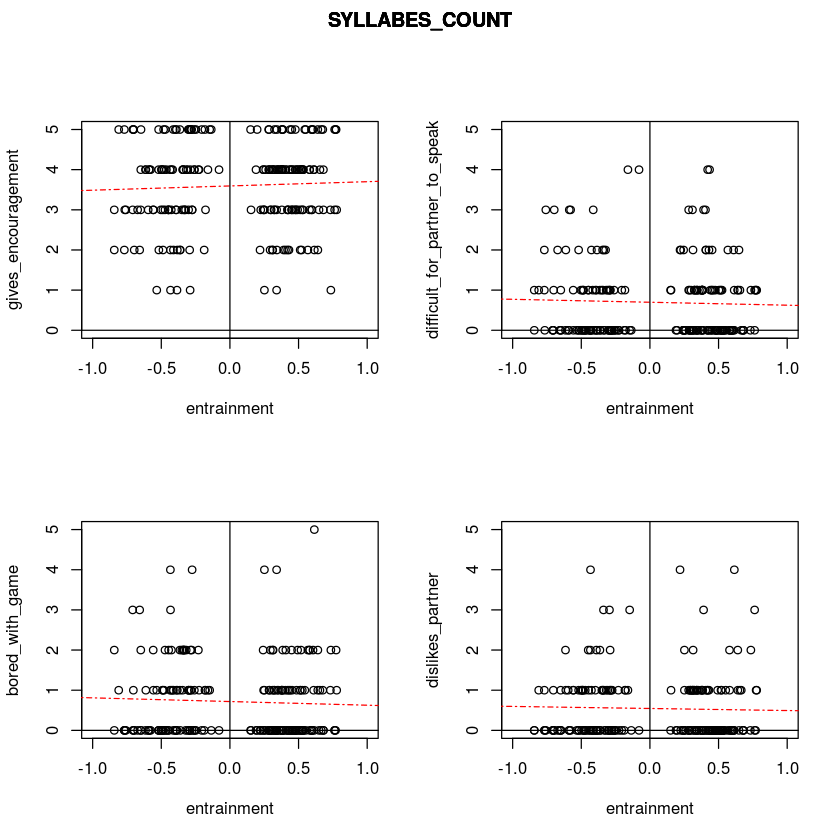

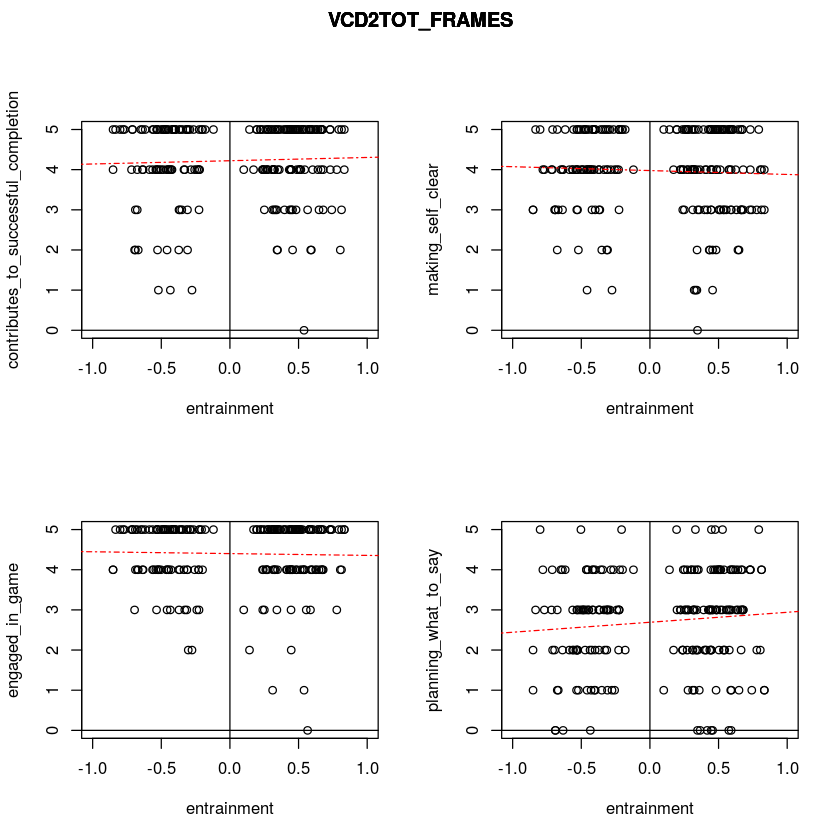

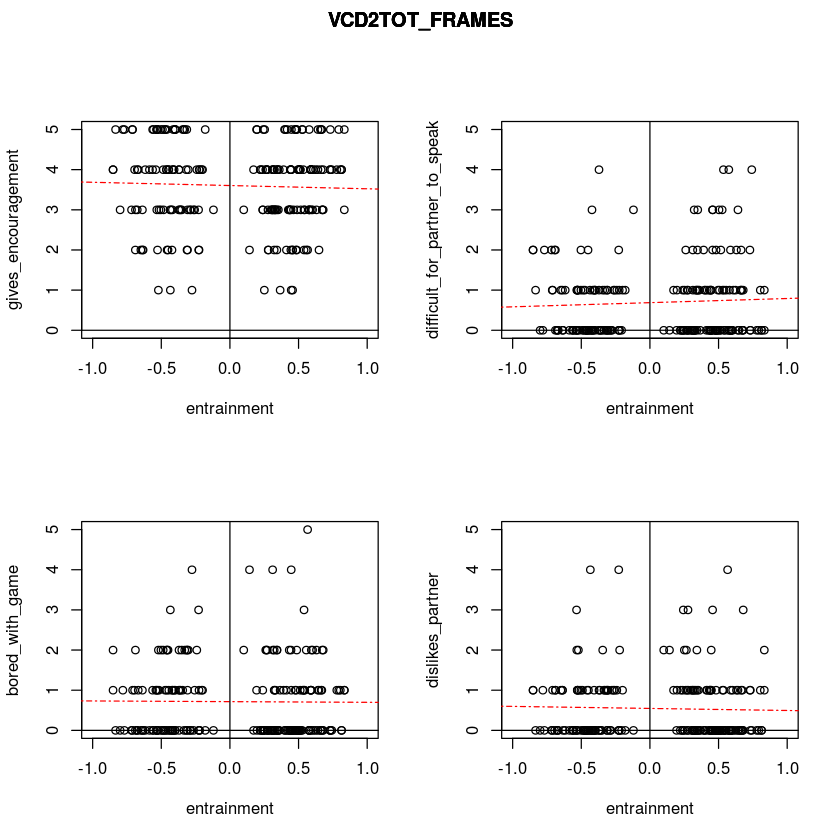

In [2]:
restart_plot <- function(ap_var, number) {
    #pdf(paste("latex/src/images/regression_", ap_var, "_", number, ".pdf", sep=""))
    par(mfrow=c(2,2), oma=c(0,0,2,0))
}


for (ap_var in ap_vars) {
    dat <- load_csv(ap_var)
    # Descomentar para mandar el output a svg's
    restart_plot(ap_var, "1")
    
    i = 1;
        
    while ( i <= length(social_vars)) {
          
        social_var <- social_vars[i]
        subdat <- dat[c("entrainment", social_var)]
              
        # Regresión de la variable social sobre el entrainment
        formula <- paste(social_var, " ~ entrainment", sep="")
        regression <- lm(formula, data=dat) 
        
        plot(subdat, xlim=c(-1, 1), ylim=c(0,5))
        abline(regression, col="red", lty="dotdash")
        abline(h=0)
        abline(v=0)
        
        title(ap_var, outer=TRUE)
        if (i == 4) {
          restart_plot(ap_var, "2")
        }
        i <- i + 1
    }
}


Ahora vamos a hacer el test de coeficientes para cada uno de éstas regresiones.

Veamos para cada de una de éstas la pendiente... ¿deberíamos ver la  

In [3]:
if (!require("lmtest")) install.packages("lmtest")

# Arma la tabla de regresión, dado un dataframe de una variable a/p
    
get_slope_coefs <- function(coefs) {
    return (as.numeric(t(coefs)[5:8]));
}

get_regression_table <- function(dat, dependent_variable="entrainment") {
    regression_table <- data.frame()

    for ( social_var in social_vars) {
        regression <- lm(paste(social_var, " ~", dependent_variable, sep=""), data=dat) 
        coefs <- coeftest(regression)
        # con ésto, me quedo sólo con los outputs del slope
        row <- get_slope_coefs(coefs)
        
        regression_table <- rbind(regression_table, row)
    }
    
    rownames(regression_table) <- social_vars
    colnames(regression_table) <- c("Estimate", "Std. Error", "t value", "Pr(>|t|)")
    
    return(regression_table)
}    

for (ap_var in ap_vars) {
    dat <- load_csv(ap_var)
    print(ap_var)
    df <- get_regression_table(dat)
    #print(xtable(df, digits=c(4,4,4,-6,4)))
    print(df)
}


[1] "ENG_MAX"
                                      Estimate Std. Error  t value Pr(>|t|)
contributes_to_successful_completion -0.055789     0.1400 -0.39854   0.6906
making_self_clear                     0.145403     0.1475  0.98546   0.3255
engaged_in_game                       0.064724     0.1178  0.54940   0.5833
planning_what_to_say                  0.086407     0.1689  0.51152   0.6095
gives_encouragement                  -0.069948     0.1486 -0.47070   0.6383
difficult_for_partner_to_speak       -0.005292     0.1304 -0.04058   0.9677
bored_with_game                       0.008263     0.1326  0.06230   0.9504
dislikes_partner                     -0.093732     0.1129 -0.83055   0.4072
[1] "ENG_MEAN"
                                      Estimate Std. Error  t value Pr(>|t|)
contributes_to_successful_completion -0.154128     0.1395 -1.10490  0.27048
making_self_clear                    -0.121180     0.1475 -0.82149  0.41231
engaged_in_game                       0.096677     0.1176  

# Pooled OLS con abs_entrainment

Hagamos lo mismo, pero en vez de usar la fórmula $ sv \sim entrainment$, usemos $ sv \sim abs(entrainment)$

PD: agregar explicación del disentrainment

In [4]:
for (ap_var in ap_vars) {
    dat <- load_csv(ap_var)
    print(ap_var)
    df <- get_regression_table(dat, dependent_variable="abs_entrainment")
    print(df)
}

[1] "ENG_MAX"
                                     Estimate Std. Error t value Pr(>|t|)
contributes_to_successful_completion -0.18514     0.3852 -0.4806 0.631285
making_self_clear                     1.25021     0.3977  3.1435 0.001913
engaged_in_game                       0.39057     0.3233  1.2079 0.228457
planning_what_to_say                  0.16128     0.4651  0.3468 0.729115
gives_encouragement                   0.67113     0.4066  1.6507 0.100307
difficult_for_partner_to_speak       -0.41360     0.3578 -1.1560 0.249021
bored_with_game                       0.07598     0.3650  0.2082 0.835292
dislikes_partner                     -0.41387     0.3098 -1.3359 0.183028
[1] "ENG_MEAN"
                                     Estimate Std. Error  t value Pr(>|t|)
contributes_to_successful_completion  0.46320     0.4021  1.15183  0.25072
making_self_clear                     0.64317     0.4237  1.51794  0.13055
engaged_in_game                       0.76198     0.3355  2.27121  0.02416
plann

# Test por coeficientes de regresión

Esto es un test para verificar como sacar los coeficientes de la pendiente de un test.

Antes teníamos un error por sacar los coeficientes de manera incorrecta del arreglo/matriz. Recordar que en R las matrices se almacenan como concatenación de columnas (de la misma manera que en Fortran)

In [5]:
dat <- load_csv("F0_MEAN")
social_var <- "bored_with_game"

regression <- lm(paste(social_var, " ~", "entrainment", sep=""), data=dat)
coefs <- coeftest(regression)
print(regression)
print(coefs)
print(as.numeric(t(coefs)[5:8]))


Call:
lm(formula = paste(social_var, " ~", "entrainment", sep = ""), 
    data = dat)

Coefficients:
(Intercept)  entrainment  
     0.7182      -0.0518  


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.7182     0.0672   10.69   <2e-16 ***
entrainment  -0.0518     0.1333   -0.39      0.7    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

[1] -0.05177  0.13327 -0.38843  0.69809
